In [8]:
import numpy as np
import random
import scipy.linalg as la
import matplotlib.pylab as plt
import scipy.sparse as sps
from scipy.stats import norm 
from numpy import random
import seaborn as sns
import pandas as pd
from scipy.optimize import root


In [6]:
np.log(np.exp(1))

1.0

In [16]:
# Input parameters
sigma = 5
rho = 3
A = 1
w = 1
f = 1
Z = 0.1

def r(z_bar):
    gamma = 1/sigma * (sigma/(sigma-1))** (1-sigma) * (rho/(rho-1))**(-rho)
    integral = np.exp((sigma-1)**2)* norm.cdf(((sigma-1)**2 - np.log(z_bar))/(sigma-1))
    resid = gamma * A * (w**(1-rho)) * Z**(rho-1) * integral**((sigma-rho)/(1-sigma)) * z_bar**(sigma-1) - w*f
    return resid

sol = root(r, 1, method='hybr', jac = False)
sol

    fjac: array([[-1.]])
     fun: array([-1.07691633e-14])
 message: 'The solution converged.'
    nfev: 23
     qtf: array([-5.85549564e-09])
       r: array([-0.06759143])
  status: 1
 success: True
       x: array([59.18771578])

Text(0, 0.5, 'z_bar(Z)')

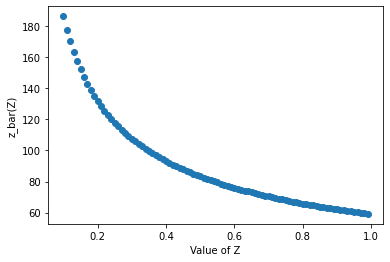

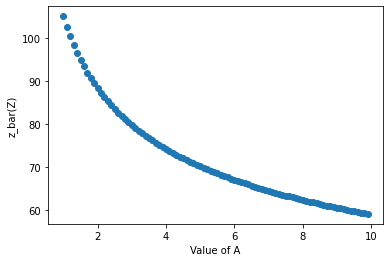

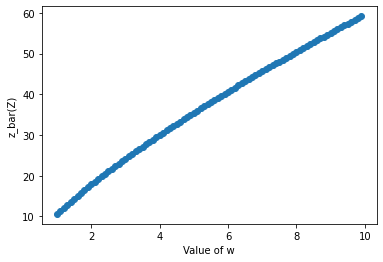

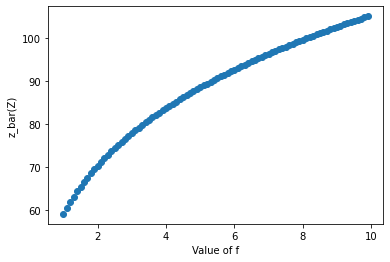

In [65]:
# Solve for z_bar given different values of Z between 0.1 and 1
z_bar_array = {}
sol_array = {}

for Z in np.arange(0.1, 1, 0.01):
    sol = root(r, 0.1, method='hybr', jac = False)
    sol_array[Z] = sol.success
    z_bar_array[Z] = sol.x[0]

plt.figure()
plt.scatter(list(z_bar_array.keys()), list(z_bar_array.values()))
plt.xlabel('Value of Z')
plt.ylabel('z_bar(Z)')


# Solve for z_bar given different values of A between 1 and 10
z_bar_array = {}
sol_array = {}

for A in np.arange(1, 10, 0.1):
    sol = root(r, 0.1, method='hybr', jac = False)
    sol_array[A] = sol.success
    z_bar_array[A] = sol.x[0]

plt.figure()
plt.scatter(list(z_bar_array.keys()), list(z_bar_array.values()))
plt.xlabel('Value of A')
plt.ylabel('z_bar(Z)')


# Solve for z_bar given different values of w between 1 and 10
z_bar_array = {}
sol_array = {}

for w in np.arange(1, 10, 0.1):
    sol = root(r, 0.1, method='hybr', jac = False)
    sol_array[w] = sol.success
    z_bar_array[w] = sol.x[0]

plt.figure()
plt.scatter(list(z_bar_array.keys()), list(z_bar_array.values()))
plt.xlabel('Value of w')
plt.ylabel('z_bar(Z)')

# Solve for z_bar given different values of f between 1 and 10
z_bar_array = {}
sol_array = {}

for f in np.arange(1, 10, 0.1):
    sol = root(r, 0.1, method='hybr', jac = False)
    sol_array[f] = sol.success
    z_bar_array[f] = sol.x[0]

plt.figure()
plt.scatter(list(z_bar_array.keys()), list(z_bar_array.values()))
plt.xlabel('Value of f')
plt.ylabel('z_bar(Z)')

Text(0, 0.5, 'z_bar(Z)')

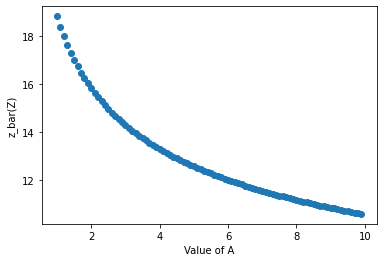

In [61]:
# Solve for z_bar given different values of A between 1 and 10
z_bar_array = {}
sol_array = {}

for A in np.arange(1, 10, 0.1):
    sol = root(r, 0.1, method='hybr', jac = False)
    sol_array[A] = sol.success
    z_bar_array[A] = sol.x[0]

plt.scatter(list(z_bar_array.keys()), list(z_bar_array.values()))
plt.xlabel('Value of A')
plt.ylabel('z_bar(Z)')